In [2]:
# !pip install --upgrade pip
# !pip install pandas
# !cp ./fp_refined.csv /data

In [3]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt


import pandas as pd

from tqdm import tnrange, tqdm_notebook


tf.enable_eager_execution()

In [4]:
path_csv = "/data/fp_refined.csv"

df = pd.read_csv(path_csv)
df

,id_after,Path,index,APT_ID,Date,year,norm_year,yyyymm,N_Housings,Max_Floors,...,sido_cluster_code,sido_sgg_name,FP_ID,Area,norm_log_area,area_85,Entrance,Rooms,Baths,N_Units
0,8928_160,/data/fp_img_processed/8928_160.png,1,8928,2004-06-01T00:00:00Z,2004,0.70,200406,212,22,...,0,서울시 강남구,160,134.30,1.313282,False,계단식,4,2,84
1,8928_183,/data/fp_img_processed/8928_183.png,2,8928,2004-06-01T00:00:00Z,2004,0.70,200406,212,22,...,0,서울시 강남구,183,153.80,1.702528,False,계단식,4,2,44
2,8928_201A,/data/fp_img_processed/8928_201A.png,3,8928,2004-06-01T00:00:00Z,2004,0.70,200406,212,22,...,0,서울시 강남구,201A,170.32,1.995448,False,계단식,4,2,42
3,8928_204B,/data/fp_img_processed/8928_204B.png,4,8928,2004-06-01T00:00:00Z,2004,0.70,200406,212,22,...,0,서울시 강남구,204B,168.42,1.963240,False,계단식,4,2,42
4,960_35,/data/fp_img_processed/960_35.png,5,960,1982-11-01T00:00:00Z,1982,0.26,198211,5040,5,...,0,서울시 강남구,35,35.64,-2.495452,False,계단식,2,1,530
5,960_41,/data/fp_img_processed/960_41.png,6,960,1982-11-01T00:00:00Z,1982,0.26,198211,5040,5,...,0,서울시 강남구,41,41.98,-2.025393,False,계단식,2,1,1450
6,960_45,/data/fp_img_processed/960_45.png,7,960,1982-11-01T00:00:00Z,1982,0.26,198211,5040,5,...,0,서울시 강남구,45,45.26,-1.809404,False,계단식,2,1,80
7,960_49F,/data/fp_img_processed/960_49F.png,8,960,1982-11-01T00:00:00Z,1982,0.26,198211,5040,5,...,0,서울시 강남구,49F,49.56,-1.548828,False,계단식,2,1,326
8,960_50S,/data/fp_img_processed/960_50S.png,9,960,1982-11-01T00:00:00Z,1982,0.26,198211,5040,5,...,0,서울시 강남구,50S,50.64,-1.486935,False,계단식,2,1,1470
9,960_53,/data/fp_img_processed/960_53.png,10,960,1982-11-01T00:00:00Z,1982,0.26,198211,5040,5,...,0,서울시 강남구,53,53.63,-1.322233,False,계단식,3,1,65


In [5]:
seoul = df['sido_cluster_code'] == 0
y2004 = df['year'] == 2004

df[seoul & y2004]['Area'].describe()

count    1293.000000
mean       95.341926
std        41.270327
min        16.780000
25%        68.590000
50%        84.850000
75%       115.920000
max       288.900000
Name: Area, dtype: float64

In [6]:
l84 = df['Area'] > 84
s85 = df['Area'] < 85

df[seoul & y2004 & l84 & s85]

,id_after,Path,index,APT_ID,Date,year,norm_year,yyyymm,N_Housings,Max_Floors,...,sido_cluster_code,sido_sgg_name,FP_ID,Area,norm_log_area,area_85,Entrance,Rooms,Baths,N_Units
93,9765_107A,/data/fp_img_processed/9765_107A.png,94,9765,2004-06-01T00:00:00Z,2004,0.7,200406,130,14,...,0,서울시 강남구,107A,84.99,-0.000338,True,계단식,3,2,86
94,9765_107D,/data/fp_img_processed/9765_107D.png,95,9765,2004-06-01T00:00:00Z,2004,0.7,200406,130,14,...,0,서울시 강남구,107D,84.87,-0.004394,True,계단식,3,2,14
95,9765_108B,/data/fp_img_processed/9765_108B.png,96,9765,2004-06-01T00:00:00Z,2004,0.7,200406,130,14,...,0,서울시 강남구,108B,84.91,-0.003042,True,계단식,3,2,8
97,101321_107B,/data/fp_img_processed/101321_107B.png,98,101321,2004-06-01T00:00:00Z,2004,0.7,200406,136,14,...,0,서울시 강남구,107B,84.25,-0.025445,True,계단식,3,2,18
98,101321_107A,/data/fp_img_processed/101321_107A.png,99,101321,2004-06-01T00:00:00Z,2004,0.7,200406,136,14,...,0,서울시 강남구,107A,84.72,-0.009473,True,계단식,3,2,54
118,11616_111,/data/fp_img_processed/11616_111.png,119,11616,2004-05-01T00:00:00Z,2004,0.7,200405,81,9,...,0,서울시 강남구,111,84.94,-0.002027,True,계단식,3,2,65
533,12230_101C,/data/fp_img_processed/12230_101C.png,534,12230,2004-11-01T00:00:00Z,2004,0.7,200411,67,23,...,0,서울시 강남구,101C,84.05,-0.032269,True,계단식,2,1,16
534,12230_102D,/data/fp_img_processed/12230_102D.png,535,12230,2004-11-01T00:00:00Z,2004,0.7,200411,67,23,...,0,서울시 강남구,102D,84.77,-0.007779,True,계단식,2,2,16
535,12230_102A,/data/fp_img_processed/12230_102A.png,536,12230,2004-11-01T00:00:00Z,2004,0.7,200411,67,23,...,0,서울시 강남구,102A,84.86,-0.004733,True,계단식,2,2,17
571,13441_105,/data/fp_img_processed/13441_105.png,572,13441,2004-07-01T00:00:00Z,2004,0.7,200407,59,9,...,0,서울시 강남구,105,84.91,-0.003042,True,계단식,3,2,5


In [7]:
df.loc[:, ['Path', 'id_after', 'norm_year', 'sido_cluster_code', 'norm_log_area', 'area_85', 'Entrance', 'Rooms', 'Baths']].values[0]

array(['/data/fp_img_processed/8928_160.png', '8928_160', 0.7, 0,
       1.313281813316609, False, '계단식', 4, 2], dtype=object)

In [8]:
import tensorflow as tf
import numpy as np

tf.enable_eager_execution()

In [9]:
def _parse_predict_function(example_proto):
    # Create a description of the features.  
    feature_description = {
        # [AREA_UNIT, AREA_ENTRANCE, AREA_LDK, AREA_BEDROOM, AREA_BALCONY, AREA_BATHROOM]
        'floorplan': tf.FixedLenFeature([28, 28, 6], tf.float32, 
                                        default_value=tf.zeros([28, 28, 6], tf.float32)),
        
        'plan_id': tf.FixedLenFeature([], tf.string, default_value=''),
        'norm_year': tf.FixedLenFeature([], tf.float32, default_value=-1.0),
        'sido': tf.FixedLenFeature([], tf.int64, default_value=-1),
        'norm_area': tf.FixedLenFeature([], tf.float32, default_value=0.0),
        'is_area_85': tf.FixedLenFeature([], tf.int64, default_value=0),
        'is_core': tf.FixedLenFeature([], tf.int64, default_value=0),
        'num_rooms': tf.FixedLenFeature([], tf.int64, default_value=-1),
        'num_baths': tf.FixedLenFeature([], tf.int64, default_value=-1)
    }
    
    # Parse the input tf.Example proto using the dictionary above.
    parsed_example = tf.parse_single_example(example_proto, feature_description)
    
    return parsed_example['floorplan'], parsed_example['plan_id'], parsed_example['norm_year']

def create_predict_dataset(filepaths):
    
    # This works with arrays as well
    dataset = tf.data.TFRecordDataset(filepaths, compression_type="GZIP")
    
    # Maps the parser on every filepath in the array. You can set the number of parallel loaders here
    dataset = dataset.map(_parse_predict_function, num_parallel_calls=8)

    # Set the batchsize
    dataset = dataset.batch(8)
    
    return dataset


path_train_tfrecord = "/data/fp_train.tfrecord"
path_test_tfrecord = "/data/fp_test.tfrecord"

paths_predict_tfrecord = [path_train_tfrecord, path_test_tfrecord]

predict_dataset =  create_predict_dataset(paths_predict_tfrecord)
iter = predict_dataset.make_one_shot_iterator()

fps = []
ids = []
for batch in iter:
    fps.extend(batch[0].numpy())
    ids.extend(batch[1].numpy())

ids = [id.decode() for id in ids]

len(fps), fps[0].shape

Instructions for updating:
Colocations handled automatically by placer.


(50540, (28, 28, 6))

In [10]:
ids[0:20]

['2829_105',
 '999_37',
 '7770_55A',
 '2140_92B',
 '509_73',
 '19478_113',
 '8657_70',
 '1856_61',
 '25606_107C',
 '27502_140B',
 '2791_140',
 '4982_140',
 '9862_82',
 '107065_119D-1',
 '103529_111A',
 '15320_162',
 '26134_117C',
 '13090_65',
 '26485_114A',
 '463_114A']

In [11]:
ids.index('9765_107A')

45898

In [12]:
fps = np.clip(fps, 0, 1)
np.amax(fps), np.amin(fps)

(1.0, 0.0)

[[ 0.    0.    0.    1.  ]
 [-1.   -0.67 -1.    0.  ]
 [ 0.   -0.75 -1.    0.  ]
 [-1.   -0.74  0.    0.  ]
 [-0.17 -0.13 -1.    0.  ]
 [-1.   -0.19 -0.24  0.  ]]
(28, 28, 6)
(50540, 28, 28, 4)
[[0.00000006 0.25000004 0.00000006 0.        ]
 [0.         0.25       0.         0.        ]
 [0.00000006 0.25000004 0.00000006 0.        ]
 ...
 [0.         0.25       0.         0.        ]
 [0.         0.25000004 0.00000006 0.        ]
 [0.         0.25       0.         0.        ]]
[[1.         1.         1.         0.99999994]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         0.99999994]
 ...
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]]


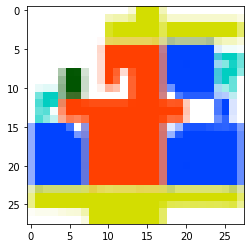

In [13]:
# adjusted for different luminance
channel_to_rgba = np.array(
    [[0., 0., 0., 1.], # unit mask to alpha
     [0., 0.33, 0., 0.], # entrance to green L30
     [1., 0.25, 0., 0.], # LDK to red L57
     [0., 0.26, 1., 0.], # bedroom to blue L40
     [0.83, 0.87, 0., 0.], # balcony to yellow L85
     [0., 0.81, 0.76, 0.]]) # bathroom to cyan L75

# make colors subtractive
channel_to_rgba[1:6, 0:3] -= 1

print(channel_to_rgba)
print(fps[0].shape)

# put it on transparent white
fps_rgba = np.array([1.,1.,1.,0.])+(np.array(fps) @ channel_to_rgba)
print(fps_rgba.shape)

np.set_printoptions(suppress=True)
print(np.amin(fps_rgba, axis=(1,2)))
print(np.amax(fps_rgba, axis=(1,2)))


fig = plt.figure()
ax = plt.imshow(fps_rgba[5])

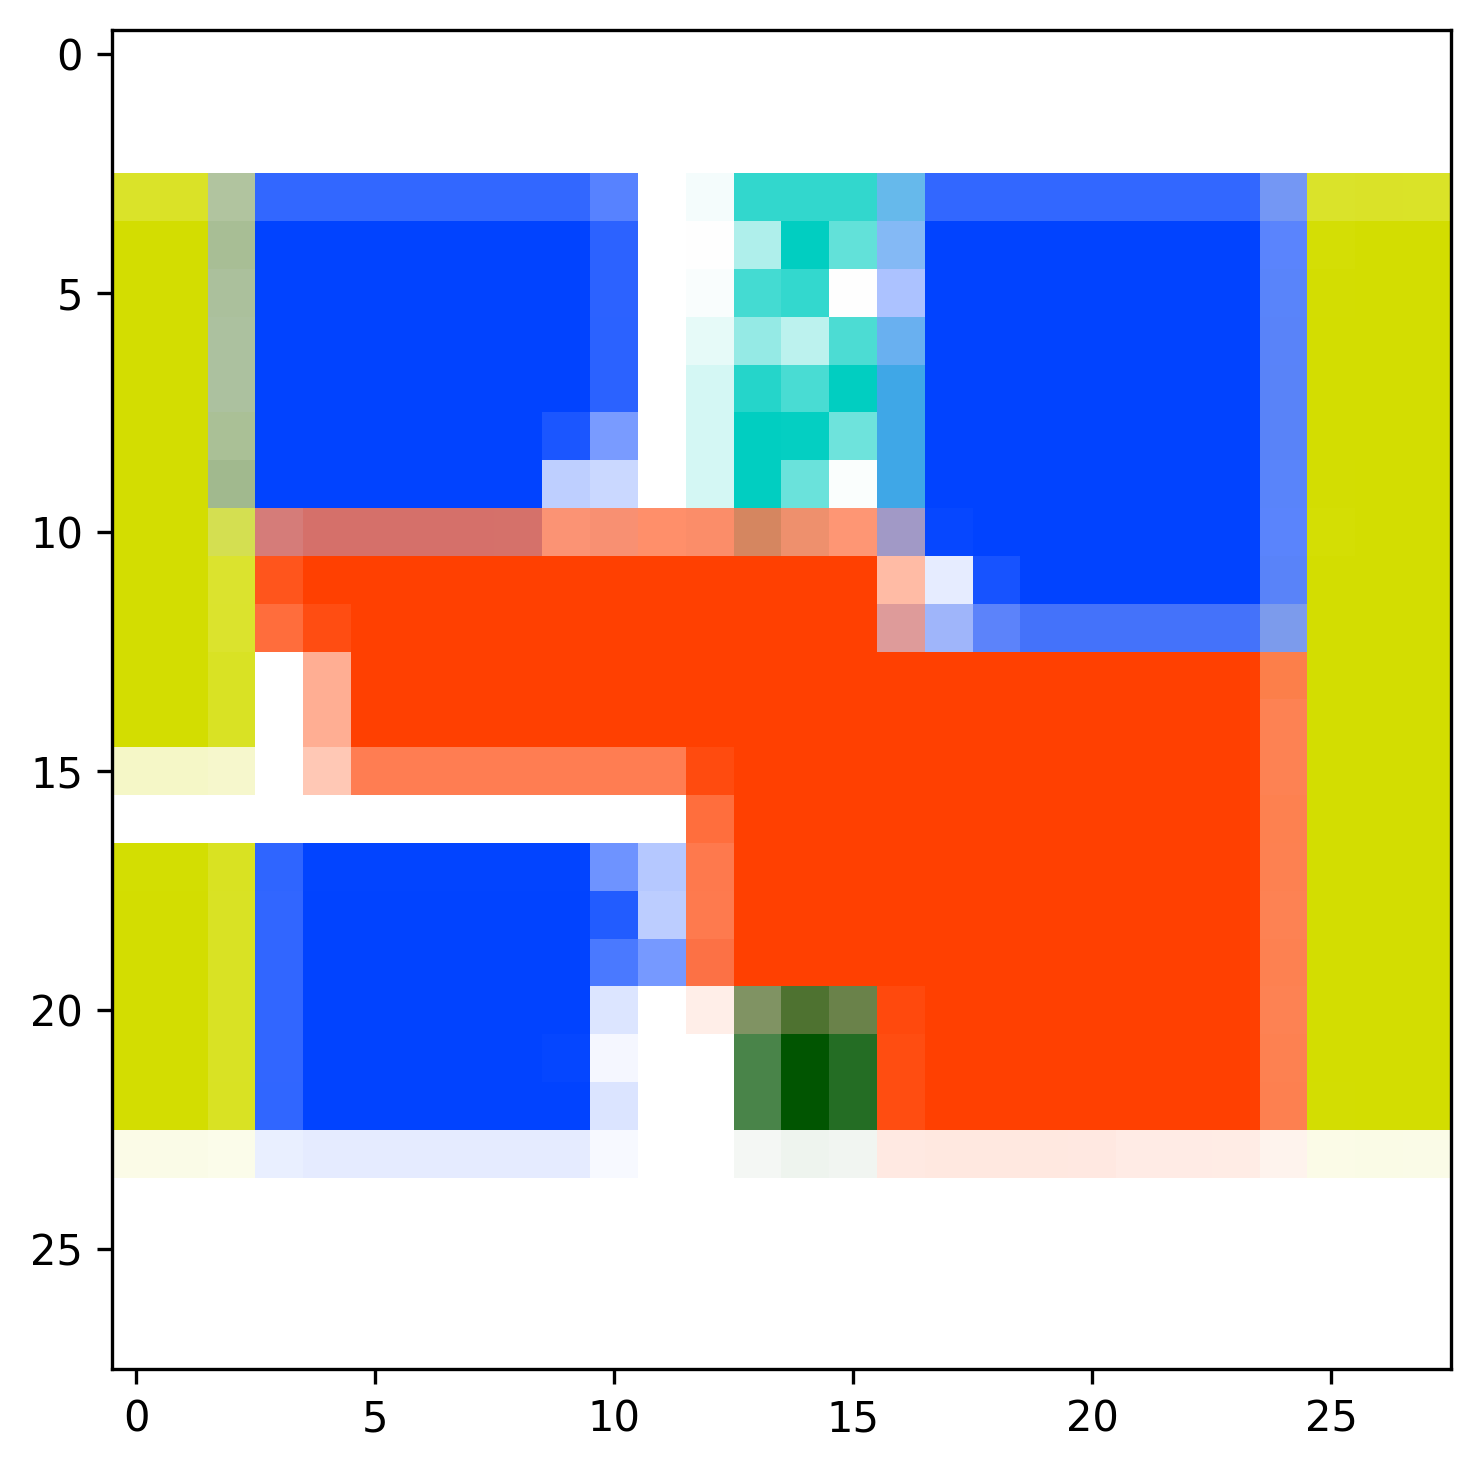

In [14]:
fig = plt.figure(figsize=(5, 5), dpi=300)
ax = plt.imshow(fps_rgba[ids.index("9765_107A")])
plt.tight_layout()
fig.savefig("9765_107A.pdf")

In [15]:
from sklearn.utils import shuffle

size_x, size_y = 40, 20
N = size_x * size_y

df = pd.DataFrame(ids, columns=['id'])
df['row'] = np.arange(len(df))
sample = df.sample(N, random_state=1106)
sample

,id,row
23198,104531_83C,23198
29449,18549_78A,29449
46457,26130_105B,46457
42565,19113_145,42565
49156,19672_113,49156
46886,3327_75,46886
24930,22627_109A,24930
4844,19690_87B,4844
17232,24668_149A,17232
25021,1383_107(쌍용),25021


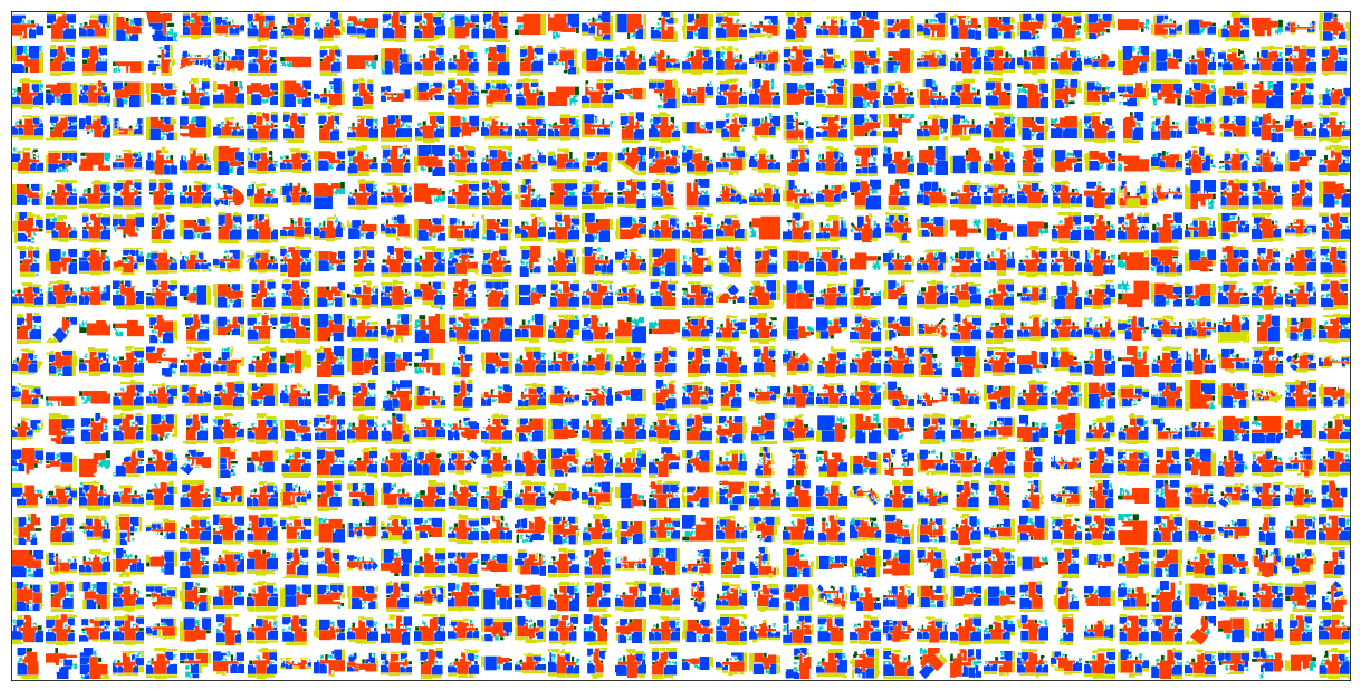

In [17]:
fp_map = np.zeros((size_y*30, size_x*30, 4)) # rc coord
for r in range(size_y):
    for c in range(size_x):
        row = sample.row.iat[r+size_y*c]
        
        # 1px padding
        fp_map[r*30+1:r*30+29, c*30+1:c*30+29] = \
            fps_rgba[row]
        
fig = plt.figure(figsize=(24,24))
plt.imshow(fp_map)
ax = fig.gca()
ax.set_facecolor("white")
_ = ax.set_xticks([]), ax.set_yticks([])

(40, 20)
0.0 0.0 1.0 1.0


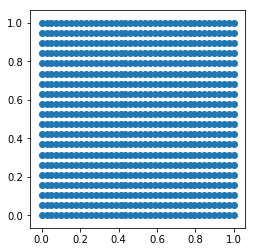

In [13]:
grid_x, grid_y = np.meshgrid(np.linspace(0, 1, size_x),
                             np.linspace(0, 1, size_y),
                             indexing='ij')
print(grid_x.shape)
print(grid_x[0, 0], grid_y[0, 0], grid_x[39, 19], grid_y[39, 19])
fig = plt.figure()
fig.gca().set_aspect('equal')
plt.scatter(grid_x.flatten(), grid_y.flatten())